### Netflix-Association-Analysis
The project aims to provide valuable insights into Netflix's content
Apriori Algorithm: Used for association analysis to uncover frequent itemsets among movie release countries.

##### Data Sourcehttps://www.kaggle.com/datasets/shivamb/netflix-shows


In [1]:
#pip install mlxtend

In [2]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# File path to the dataset
df = pd.read_csv("netflix_titles.csv")
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [4]:
df = df[['country']]
## Remove rows containing NA values
df = df.dropna()
# If the dataset contains multiple countries, split them into separate rows
df['country'] = df['country'].str.split(', ')
df

,country
0,[United States]
1,[South Africa]
4,[India]
7,"[United States, Ghana, Burkina Faso, United Ki..."
8,[United Kingdom]
...,...
8801,"[United Arab Emirates, Jordan]"
8802,[United States]
8804,[United States]
8805,[United States]


In [8]:
# Use TransactionEncoder for encoding(二進位矩陣格式)
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(df['country']).transform(df['country'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded

,,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Kingdom,"United Kingdom,",United States,"United States,",Uruguay,Vatican City,Venezuela,Vietnam,West Germany,Zimbabwe
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7971,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7972,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
7973,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
7974,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


The main purpose of this code is to convert country data (stored as lists in a column) into a structured binary format, which is required by certain machine learning algorithms like the Apriori algorithm for association rule mining.
The goal is to create a binary matrix where:
Each row represents a movie.
Each column represents a country.
A value of 1 means the country is associated with that movie, and 0 means it is not.

     support                         itemsets
25  0.462513                  (United States)
11  0.131143                          (India)
24  0.100802                 (United Kingdom)
4   0.055792                         (Canada)
8   0.049273                         (France)
14  0.039870                          (Japan)
34  0.034980  (United States, United Kingdom)
20  0.029087                          (Spain)
19  0.028962                    (South Korea)
9   0.028335                        (Germany)
28  0.027207          (United States, Canada)
15  0.021189                         (Mexico)
5   0.020311                          (China)
1   0.020060                      (Australia)
30  0.015672          (United States, France)
7   0.014669                          (Egypt)
23  0.014168                         (Turkey)
10  0.013164                      (Hong Kong)
16  0.012914                        (Nigeria)
13  0.012538                          (Italy)
3   0.012161                      

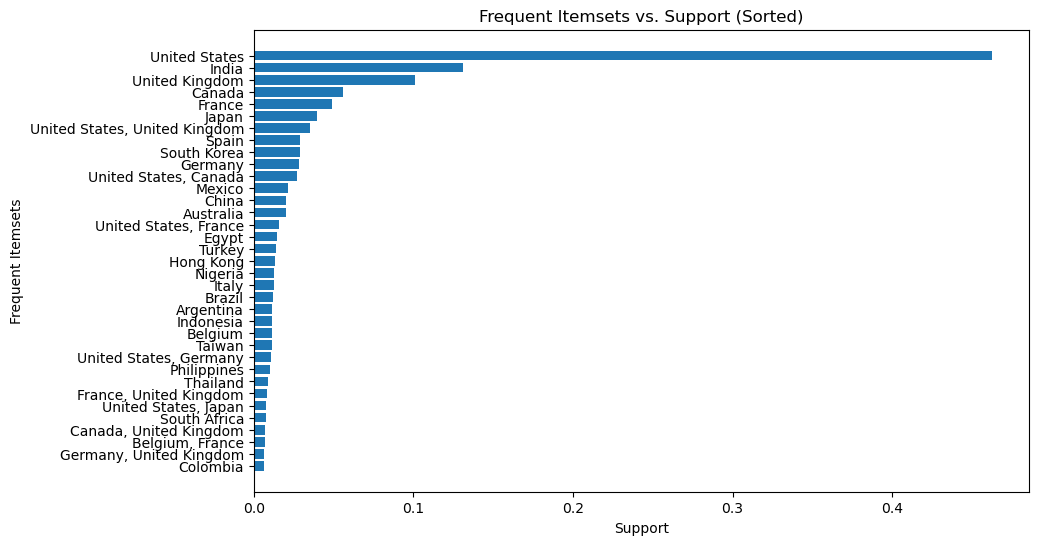

In [5]:
# Find frequent itemsets using min_support as the minimum support threshold
frequent_itemsets = apriori(df_encoded, min_support=0.0065, use_colnames=True)

# Sort by support in descending order
sorted_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
print(sorted_frequent_itemsets)

# Assuming frequent_itemsets is a DataFrame containing 'itemsets' and 'support' columns
# First, sort by the 'support' column in descending order
sorted_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=True)

# Extract the sorted data and convert frozenset to a string format
itemsets = [", ".join(map(str, itemset)) for itemset in sorted_frequent_itemsets['itemsets']]
support = sorted_frequent_itemsets['support']

 # Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(itemsets)), support, tick_label=itemsets)
plt.xlabel('Support')
plt.ylabel('Frequent Itemsets')
plt.title('Frequent Itemsets vs. Support (Sorted)')
plt.show()


I set the min_support to 0.0065, which means that only itemsets that appear in at least  0.65% of the rows are considered frequent. This helps filter out low-frequency or rare itemsets. At the same time, I set the min_threshold to 0.05, filtering out association rules with low confidence.
The country with the highest support value is "United States," which indicates that a significant number of movies on Netflix are released in the United States.
Some frequent itemsets involve multiple countries, such as "United Kingdom, United States" and "Canada, United States." This suggests that there are movies frequently released in multiple countries, indicating Netflix's international presence.
"United Kingdom" and "United States" frequently appear together in the same itemset, indicating that there might be regional preferences or collaborations in movie releases between these two countries.

In [6]:
# Generate association rules using confidence as the threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)
rules

# Sort the rules by the 'confidence' column in descending order
sorted_rules = rules.sort_values(by='confidence', ascending=False)
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Belgium),(France),0.011284,0.049273,0.007146,0.633333,12.853605,1.0,0.006590,2.592892,0.932726,0.133803,0.614330,0.389186
5,(Canada),(United States),0.055792,0.462513,0.027207,0.487640,1.054329,1.0,0.001402,1.049044,0.054574,0.055400,0.046751,0.273232
11,(Germany),(United States),0.028335,0.462513,0.011033,0.389381,0.841881,1.0,-0.002072,0.880233,-0.161983,0.022995,-0.136063,0.206618
14,(United Kingdom),(United States),0.100802,0.462513,0.034980,0.347015,0.750282,1.0,-0.011642,0.823124,-0.270149,0.066208,-0.214884,0.211323
8,(France),(United States),0.049273,0.462513,0.015672,0.318066,0.687692,1.0,-0.007117,0.788181,-0.323262,0.031590,-0.268744,0.175975
9,(Germany),(United Kingdom),0.028335,0.100802,0.006520,0.230088,2.282569,1.0,0.003663,1.167923,0.578283,0.053170,0.143779,0.147383
12,(Japan),(United States),0.039870,0.462513,0.007899,0.198113,0.428341,1.0,-0.010541,0.670278,-0.581591,0.015974,-0.491917,0.107596
6,(France),(United Kingdom),0.049273,0.100802,0.008400,0.170483,1.691264,1.0,0.003433,1.084002,0.429909,0.059292,0.077492,0.126908
1,(France),(Belgium),0.049273,0.011284,0.007146,0.145038,12.853605,1.0,0.006590,1.156445,0.969995,0.133803,0.135281,0.389186
2,(Canada),(United Kingdom),0.055792,0.100802,0.007272,0.130337,1.292996,1.0,0.001648,1.033961,0.239992,0.048699,0.032846,0.101238


 This table displays the association rules sorted by confidence in descending order. It includes columns for antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, and Zhang's metric for each rule. The rule (Belgium)-> (France) has a confidence of 0.6333, indicating that if a movie is available in Belgium, there's a strong likelihood it will also be available in France.

 ● Metrics:

Confidence: Confidence in association rules represents the probability that if a movie is released in one country, it will also be released in another country. For example, a rule with a confidence of 0.63 (Belgium)-> (France) means that if a movie is released in Belgium, there is a high probability that it will also be released in France. Similarly, a rule with a confidence of 0.39 (Germany)-> (United States) indicates that if a movie is released in Germany, there is also a high probability of it being released in the United States.

Lift: Lift values greater than 1 indicate a positive association between antecedents and consequents. For example, Belgium-> France (Lift:  12.85), which means when a movie is available in Belgium, it is more likely to be available in France as well. Canada-> United States (Lift: 1.05), this means that when a movie is available in Canada, there is a slightly higher likelihood that it's also available in the United States

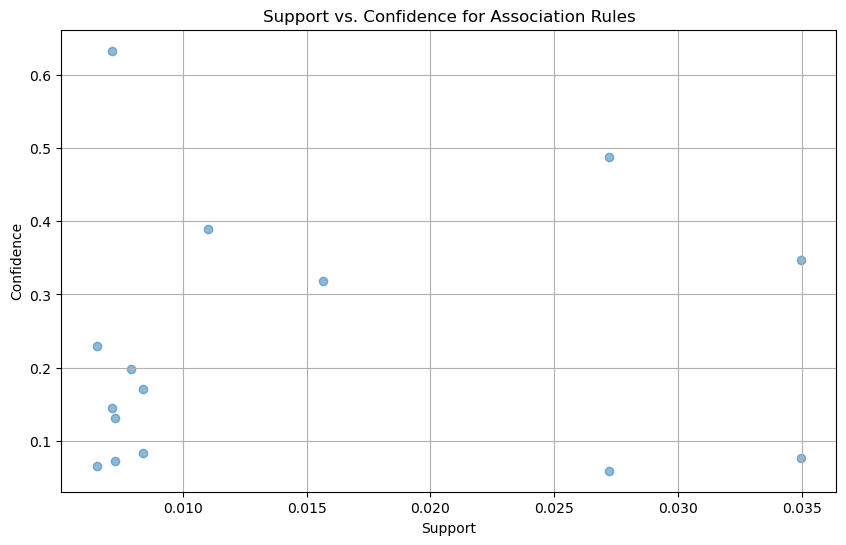

In [7]:
# Creating a DataFrame for Association Rules
rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)

# Creating a Scatter Plot for Support and Confidence
plt.figure(figsize=(10, 6))
plt.scatter(rules_df['support'], rules_df['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence for Association Rules')
plt.grid(True)
plt.show()

This Support and Confidence Scatter Plot visualizes the relationship between the support and confidence of association rules. The majority of rules are clustered in the lower-left  quadrant, indicating that most rules have low support and low confidence and the points in the upper and right areas of the plot mean fewer rules have high support or high confidence,  This information can be valuable for Netflix in terms of content distribution strategies.  They can identify which countries or regions to focus on for certain types of content, potentially leading to better content recommendations for users in those areas.

### Conclusion 
USA dominates content: A large number of Netflix movies are released in the United States, showing it is the main market for movies.
Multi-country releases: Some movies are released in multiple countries at the same time, like "USA and UK" or "USA and Canada." This highlights Netflix’s strong global presence.
Strong USA-UK connection: The USA and UK often appear together in movie release combinations, suggesting collaborations or similar audience preferences between the two countries.
Most rules have limited impact: While some interesting patterns were found, most of the associations have low impact and might just be coincidences.